<a href="https://colab.research.google.com/github/Beloveddream/RS/blob/main/minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**使用LeNet模型对Mnist手写数字进行识别**

In [3]:
# 使用LeNet模型对Mnist手写数字进行识别
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

In [4]:
# 数据加载
#(train_x, train_y), (test_x, test_y) = mnist.load_data() #从网上下载数据集
data = np.load("/content/gdrive/My Drive/les1/mnist.npz") #从本地读取数据集
print(data.files)
train_x, train_y, test_x, test_y  = data['x_train'], data['y_train'], data['x_test'], data['y_test']


['x_test', 'x_train', 'y_train', 'y_test']


In [5]:
# 输入数据为 mnist 数据集
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x / 255
test_x = test_x / 255
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [6]:
# 创建序贯模型
model = Sequential()
# 第一层卷积层：6个卷积核，大小为5∗5, relu激活函数
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第三层卷积层：16个卷积核，大小为5*5，relu激活函数
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 将参数进行扁平化，在LeNet5中称之为卷积层，实际上这一层是一维向量，和全连接层一样
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# 全连接层，输出节点个数为84个
model.add(Dense(84, activation='relu'))
# 输出层 用softmax 激活函数计算分类概率
model.add(Dense(10, activation='softmax'))
# 设置损失函数和优化器配置
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# 传入训练数据进行训练
model.fit(train_x, train_y, batch_size=128, epochs=2, verbose=1, validation_data=(test_x, test_y))
# 对结果进行评估
score = model.evaluate(test_x, test_y)
print('误差:%0.4lf' %score[0])
print('准确率:', score[1])

Epoch 1/2
469/469 [==============================] - 32s 7ms/step - loss: 0.3102 - accuracy: 0.9077 - val_loss: 0.0933 - val_accuracy: 0.9714
Epoch 2/2
313/313 [==============================] - 1s 3ms/step - loss: 0.0749 - accuracy: 0.9774
误差:0.0749
准确率: 0.977400004863739


In [ ]:
# -*- coding: utf-8 -*-
# 使用LR进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

(1797, 64)
[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
1


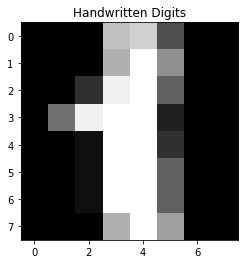

In [8]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[1])
# 第一幅图像代表的数字含义
print(digits.target[1])
# 将第一幅图像显示出来
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[1])
plt.show()

In [9]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [10]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [11]:
# 创建LR分类器
lr = LogisticRegression()
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

LR准确率: 0.9644


In [7]:
# -*- coding: utf-8 -*-
# 使用多种分类器进行MNIST手写数字分类
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import svm #SVM
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB #高斯朴素贝叶斯 GaussianNB/MultinomialNB/BernoulliNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import  AdaBoostClassifier #AdaBoost
from xgboost import XGBClassifier #XGBoost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  
import matplotlib.pyplot as plt

In [12]:
# 创建线性 CART决策树分类器
model = DecisionTreeClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('CART决策树准确率: %0.4lf' %accuracy_score(predict_y,test_y))

CART决策树准确率: 0.8622


In [13]:
# 创建LDA分类器
model = LinearDiscriminantAnalysis(n_components=2)
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('LDA准确率: %0.4lf' %accuracy_score(predict_y,test_y))

LDA准确率: 0.9378


In [14]:
# 创建贝叶斯分类器
model = GaussianNB()
model.fit(train_x,train_y)
predict_y=model.predict(test_x)
print('朴素贝叶斯准确率: %0.4lf' %accuracy_score(predict_y,test_y))

朴素贝叶斯准确率: 0.8311


In [15]:
# 创建SVM分类器
model = svm.SVC(kernel='rbf', C=1.0, gamma='auto')
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('SVM准确率: %0.4lf' %accuracy_score(predict_y,test_y))

SVM准确率: 0.9867


In [16]:
# 创建KNN分类器
model = KNeighborsClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('KNN准确率: %0.4lf' %accuracy_score(predict_y,test_y))

KNN准确率: 0.9756


In [17]:
# 创建AdaBoost分类器
# 弱分类器
dt_stump = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1)
dt_stump.fit(train_ss_x, train_y)
#dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 设置AdaBoost迭代次数
n_estimators=500
model = AdaBoostClassifier(base_estimator=dt_stump,n_estimators=n_estimators)
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('AdaBoost准确率: %0.4lf' %accuracy_score(predict_y,test_y))

AdaBoost准确率: 0.9622


In [18]:
# 创建XGBoost分类器
model = XGBClassifier()
model.fit(train_ss_x,train_y)
predict_y=model.predict(test_ss_x)
print('XGBoost准确率: %0.4lf' %accuracy_score(predict_y,test_y))

XGBoost准确率: 0.9489


In [20]:
pip install tpot

     |████████████████████████████████| 92kB 3.8MB/s 
     |████████████████████████████████| 163kB 29.2MB/s 
     |████████████████████████████████| 166.7MB 99kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=9f8a28ace43e5f1d390a539fa8fea42297db80f8abecdd16900e7450414b099d
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


**使用TPOT自动机器学习工具对MNIST进行分类**

In [1]:
# 使用TPOT自动机器学习工具对MNIST进行分类
from tpot import TPOTClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# 加载数据
digits = load_digits()
data = digits.data
print(digits.target)
X_train, X_test, y_train, y_test = train_test_split(digits.data.astype(np.float64),
    digits.target.astype(np.float64), train_size=0.75, test_size=0.25)

tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

[0 1 2 ... 8 9 8]



Generation 1 - Current best internal CV score: 0.9584441690761393

Generation 2 - Current best internal CV score: 0.9584441690761393

Generation 3 - Current best internal CV score: 0.9584441690761393

Generation 4 - Current best internal CV score: 0.9807076965441277

Generation 5 - Current best internal CV score: 0.9814511909679196

Best pipeline: KNeighborsClassifier(GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=3, max_features=0.6000000000000001, min_samples_leaf=1, min_samples_split=11, n_estimators=100, subsample=0.45), n_neighbors=4, p=1, weights=distance)
0.9866666666666667
